In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ARIMA
from pandas .plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Super_Store.csv',encoding='latin-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
df.shape

(2121, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [7]:
df1=pd.DataFrame()
df1['Order Date']=df['Order Date']
df1['Sales']=df['Sales']

In [8]:
df1=df1.sort_values('Order Date')

In [9]:
df1['Order Date']=pd.to_datetime(df1['Order Date'])
df1.set_index('Order Date',inplace=True)

In [10]:
df1.index

DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2014-01-10', '2015-01-10', '2016-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11',
               ...
               '2017-09-08', '2014-09-09', '2014-09-09', '2014-09-09',
               '2016-09-09', '2017-09-09', '2017-09-09', '2017-09-09',
               '2017-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [11]:
df1.head()

,Sales
Order Date,
2017-01-01,474.430
2017-01-01,141.420
2017-01-01,310.744
2017-01-01,48.896
2014-01-10,51.940


In [12]:
df1.shape

(2121, 1)

In [13]:
y=df1['Sales'].resample('MS').mean()

In [14]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

<AxesSubplot:xlabel='Order Date'>

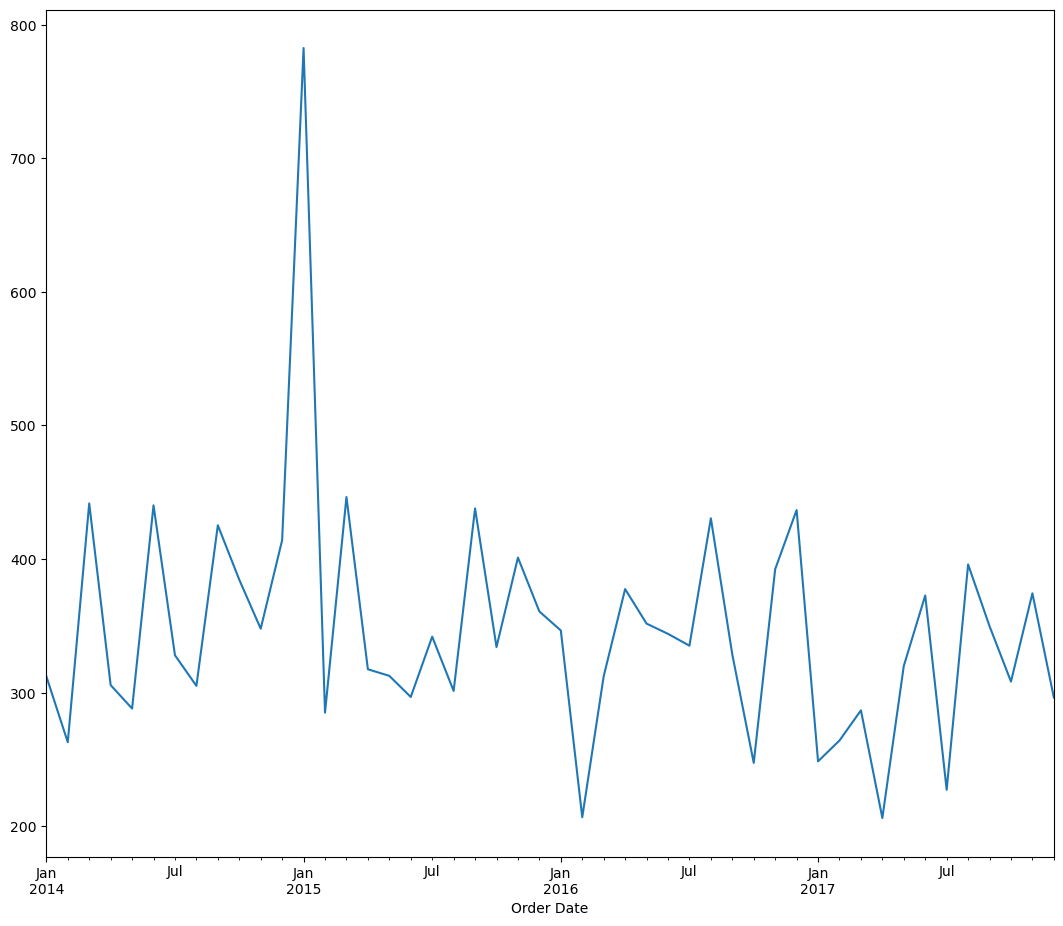

In [15]:
plt.figure(figsize=(13,11))
y.plot()

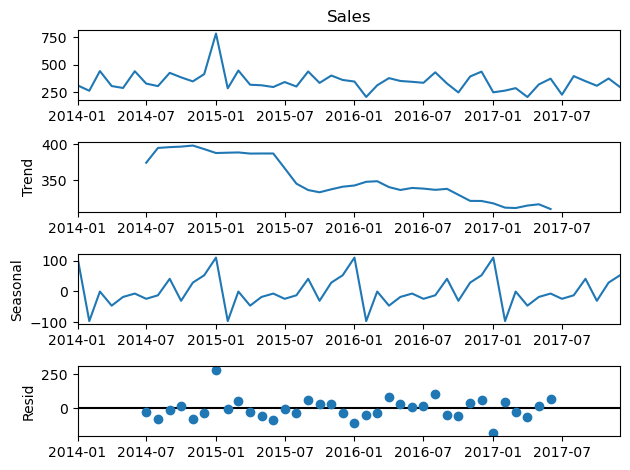

In [16]:
series=y
result=seasonal_decompose(series,model='additive')
result.plot()
plt.show()

In [17]:
result=adfuller(y)

Ho: There is no Stationarity

Ha: There is Stationarity

In [18]:
print('ADF statistic: ',round(result[0],3))
print('P-value: ',round(result[1],3))
print('Critical values: ')
for key, values in result[4].items():
    print('\t%s: %.3f'%(key,values))

ADF statistic:  -6.962
P-value:  0.0
Critical values: 
	1%: -3.578
	5%: -2.925
	10%: -2.601


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

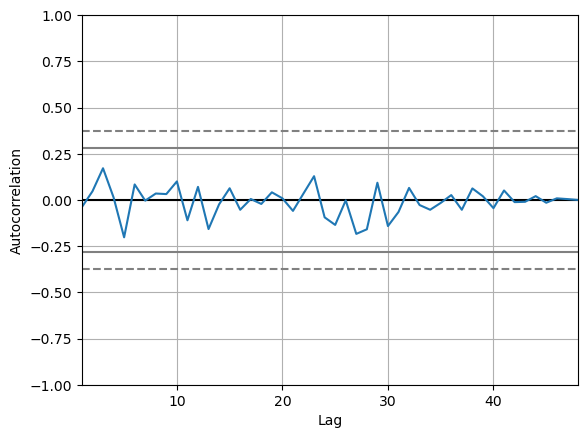

In [19]:
autocorrelation_plot(y)

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


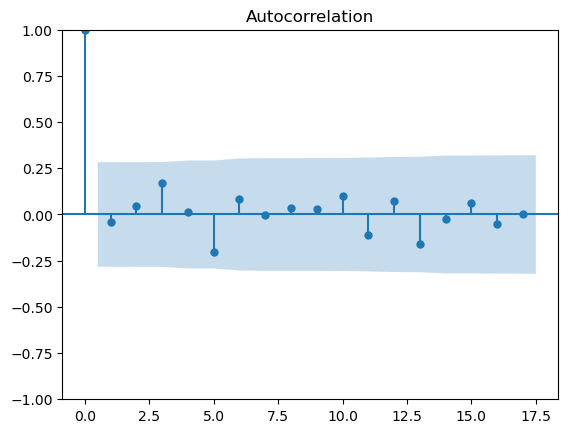

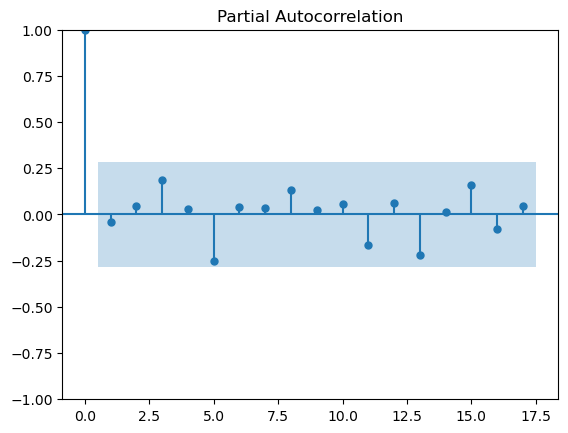

In [29]:
plot_acf(y)
plot_pacf(y)
plt.show()

In [21]:
model=sm.tsa.statespace.SARIMAX(y,order=(3,1,3))
result=model.fit()

In [22]:
forecast=result.predict(start='2014-01-01',end='2018-12-01',dynamic=False)

In [23]:
forecast

2014-01-01      0.000000
2014-02-01    309.499468
2014-03-01    287.630567
2014-04-01    328.363575
2014-05-01    330.093206
2014-06-01    340.265297
2014-07-01    337.296090
2014-08-01    327.119938
2014-09-01    349.473399
2014-10-01    353.040548
2014-11-01    342.441880
2014-12-01    353.941215
2015-01-01    363.649919
2015-02-01    382.968915
2015-03-01    424.001029
2015-04-01    425.154440
2015-05-01    340.543302
2015-06-01    329.554620
2015-07-01    384.659882
2015-08-01    396.863866
2015-09-01    345.894881
2015-10-01    326.516449
2015-11-01    381.185573
2015-12-01    413.076033
2016-01-01    362.513059
2016-02-01    327.316900
2016-03-01    359.106991
2016-04-01    373.898966
2016-05-01    340.100655
2016-06-01    340.104269
2016-07-01    376.170513
2016-08-01    377.079699
2016-09-01    341.145416
2016-10-01    346.825584
2016-11-01    378.338703
2016-12-01    353.213594
2017-01-01    329.879326
2017-02-01    373.529274
2017-03-01    379.932259
2017-04-01    316.348822


In [24]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [25]:
np.sqrt(mean_squared_error(y,forecast['2014-01-01':'2017-12-01']))

99.8178213812966

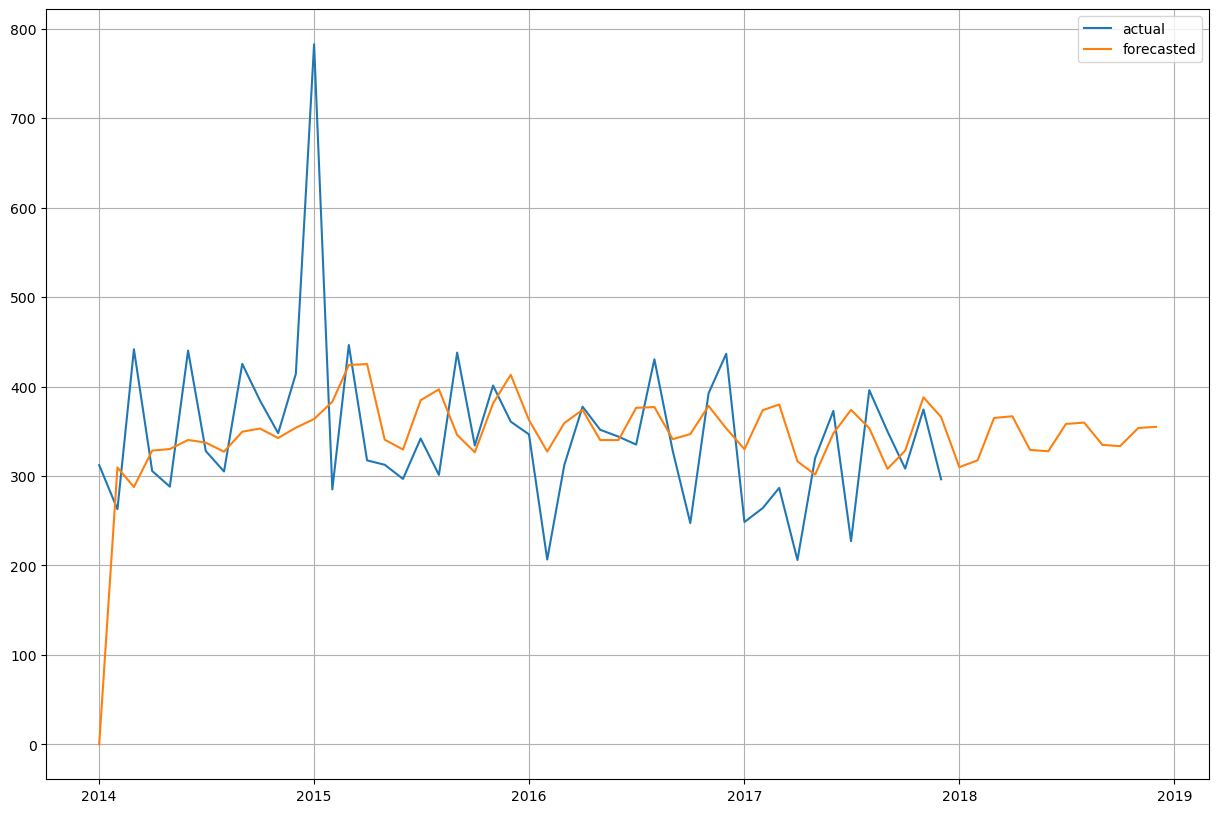

In [26]:
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(forecast)
plt.legend(['actual','forecasted'])
plt.grid()